# Horse Racing Result Visualize Importance

In [109]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from contextlib import contextmanager
from time import time
from tqdm import tqdm
import category_encoders as ce
import pandas as pd
import csv
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data preparation

In [102]:
path = '/Users/jingwenyao/Downloads/Horse Racing Results1.CSV'
data0 = pd.read_csv(path, encoding='ISO-8859-1', sep=';')
display(data0)


,Dato,Track,Race Number,Distance,Surface,Prize money,Starting position,Jockey,Jockey weight,Country,...,TrainerName,Race time,Path,Final place,FGrating,Odds,RaceType,HorseId,JockeyId,"TrainerID,,"
0,03.09.2017,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,CH Yip,"83,38",2,9,110,22,Handicap,1736,8656,"6687,"
1,16.09.2017,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,CH Yip,"81,56",3,4,124,48,Handicap,1736,8659,"6687,"
2,14.10.2017,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,CH Yip,"82,36",1,6,118,11,Handicap,1736,8659,"6687,"
3,11.11.2017,Sha Tin,9,1600,Gress,1310000,13,Brett Prebble,54,Sverige,...,CH Yip,"96,53",0,8,107,11,Handicap,1736,8453,"6687,"
4,26.11.2017,Sha Tin,9,1600,Gress,1310000,9,C Y Ho,52,Sverige,...,CH Yip,"94,17",0,3,123,40,Handicap,1736,8659,"6687,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27003,14.06.2020,Sha Tin,11,1200,Gress,1450000,6,A Hamelin,59,Australia,...,WY So,"70,87",1,9,104,25,Handicap,29038,9111,"6683,"
27004,21.06.2020,Sha Tin,2,1200,Gress,967000,7,K C Leung,57,Australia,...,KL Man,"69,91",2,5,110,124,Handicap,29056,8656,"6693,"
27005,21.06.2020,Sha Tin,4,1200,Gress,967000,6,Blake Shinn,57,Australia,...,P O'Sullivan,"69,49",0,3,114,88,Handicap,29057,8778,"6691,"
27006,21.06.2020,Sha Tin,5,1200,Gress,967000,14,Joao Moreira,57,New Zealand,...,AS Cruz,"70,08",2,7,109,22,Handicap,29058,8443,"6684,"


In [103]:
path1 = '/Users/jingwenyao/Downloads/train_final.csv'

train_data = pd.read_csv(path1, encoding='ISO-8859-1', sep=',')

train_data.head()

,Date,Race_Time,Weather,Horse_Speed
0,2023-10-18,15:02:00,Cloudy,33.265767
1,2023-10-18,16:07:00,Sunny,36.835948
2,2023-10-18,15:20:00,Sunny,42.539542
3,2023-10-18,15:42:00,Sunny,44.098244
4,2023-10-18,15:41:00,Sunny,36.085951


In [112]:
display(train_data)

,Date,Race_Time,Weather,Horse_Speed
0,2023-10-18,15:02:00,Cloudy,33.265767
1,2023-10-18,16:07:00,Sunny,36.835948
2,2023-10-18,15:20:00,Sunny,42.539542
3,2023-10-18,15:42:00,Sunny,44.098244
4,2023-10-18,15:41:00,Sunny,36.085951
...,...,...,...,...
99995,2023-10-18,15:02:00,Cloudy,46.531816
99996,2023-10-18,13:35:00,Sunny,47.838726
99997,2023-10-18,14:21:00,Sunny,51.769690
99998,2023-10-18,15:32:00,Cloudy,45.502074


In [114]:
train_data['Horse_Speed'] = pd.to_numeric(train_data['Horse_Speed'])

# Calculate mean and standard deviation
mean_speed = train_data['Horse_Speed'].mean()
std_speed = train_data['Horse_Speed'].std()

print("Mean speed of the horses:", mean_speed)
print("Standard deviation of horse speed:", std_speed)

Mean speed of the horses: 43.948800005223426
Standard deviation of horse speed: 5.7850997646845395


In [104]:
missing_values = train_data.isnull().sum()
missing_values

Date           0
Race_Time      0
Weather        0
Horse_Speed    0
dtype: int64

In [105]:
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [106]:
data1=labelencoder(data0)

# Target setting

### Horse racing speed prediction

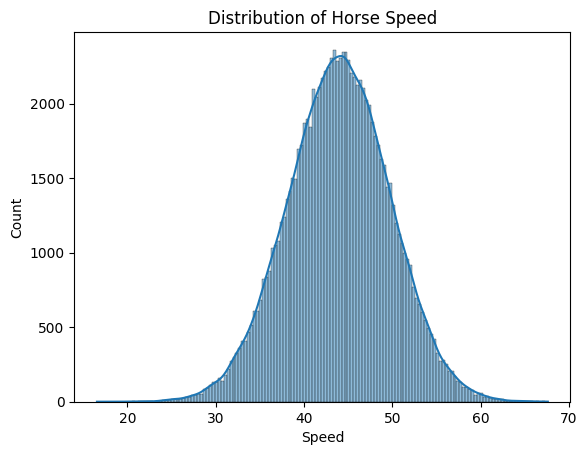

In [107]:
# Visualize the distribution of the target variable 'Horse_Speed'
sns.histplot(train_data['Horse_Speed'], kde=True)
plt.title('Distribution of Horse Speed')
plt.xlabel('Speed')
plt.ylabel('Count')
plt.show()

In [110]:
# Splitting data into training and validation sets
X = train_data[['Weather']]
X = pd.get_dummies(X, drop_first=True)
y = train_data['Horse_Speed']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse


/Users/jingwenyao/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.573673927949478

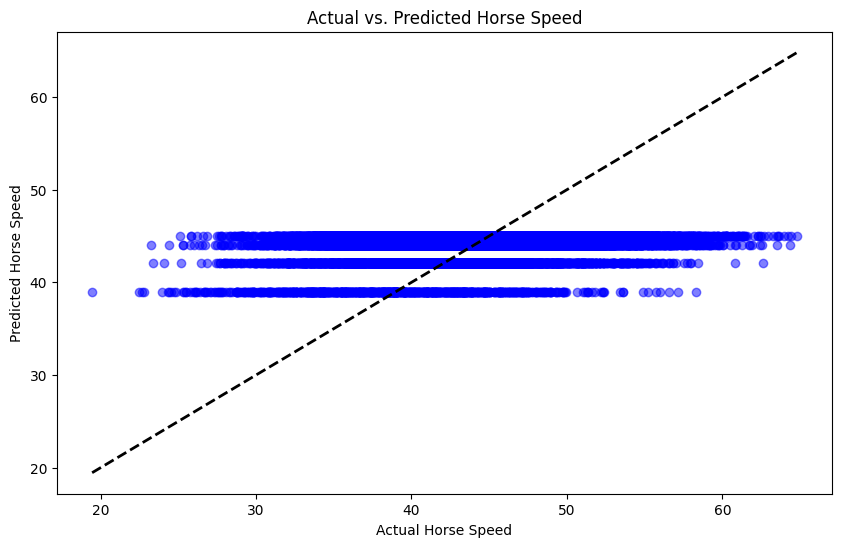

In [115]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Horse Speed')
plt.ylabel('Predicted Horse Speed')
plt.title('Actual vs. Predicted Horse Speed')
plt.show()


### Horse racing final place importace

In [111]:
target=['Final place']
datay=data1[target]
datax=data1.drop(target,axis=1)

In [63]:
train=np.array(datax)
trainy=np.array(datay)
print(train.shape)
print(trainy.shape)

(27008, 20)
(27008, 1)


In [64]:
df_columns = list(datax.columns)
print(df_columns)

['Dato', 'Track', 'Race Number', 'Distance', 'Surface', 'Prize money', 'Starting position', 'Jockey', 'Jockey weight', 'Country', 'Horse age', 'TrainerName', 'Race time', 'Path', 'FGrating', 'Odds', 'RaceType', 'HorseId', 'JockeyId', 'TrainerID,,']


In [66]:
train_df=pd.DataFrame(train)

In [67]:
train_df.columns=df_columns

In [68]:
def create_numeric_feature(input_df):
    use_columns = df_columns 
    return input_df[use_columns].copy()

In [79]:
class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [80]:
def to_feature(input_df):

    processors = [
        create_numeric_feature,
    ]
    
    out_df = pd.DataFrame()
    
    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)
        
    return out_df

In [81]:
train_feat_df = to_feature(train_df)

100%|██████████| 1/1 [00:00<00:00, 387.75it/s]

createcreate_numeric_feature  0.002[s]


# Model

Fold 0 RMSLE: 2.4728

Fold 1 RMSLE: 2.4214

Fold 2 RMSLE: 2.4681

Fold 3 RMSLE: 2.4648

Fold 4 RMSLE: 2.4717

--------------------------------------------------
FINISHED | Whole RMSLE: 2.4598


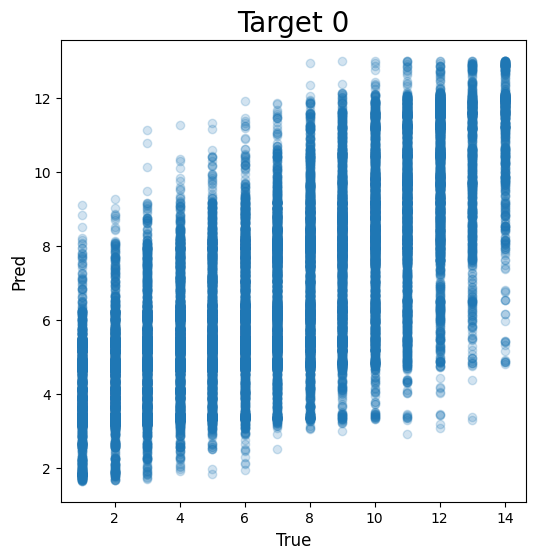

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Define the function to fit RandomForestRegressor
def fit_rf(X, y, cv, params: dict=None, verbose: int=50):
    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=float)

    for i, (idx_train, idx_valid) in enumerate(cv):
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        # Create a RandomForestRegressor model with the specified parameters
        clf = RandomForestRegressor(**params)

        # Fit the model to the training data
        clf.fit(x_train, y_train)

        # Predict on the validation data
        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)

        # Calculate and print the RMSLE for this fold
        rmsle = mean_squared_error(y_valid, pred_i) ** 0.5
        print(f'Fold {i} RMSLE: {rmsle:.4f}\n')

    # Calculate and print the overall RMSLE
    score = mean_squared_error(y, oof_pred) ** 0.5
    print('-' * 50)
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))

    return oof_pred, models

# Specify the RandomForest parameters
params = {
    "n_estimators": 100,
    "max_depth": 5,
    "random_state": 71,
}

# Assuming `trainy` and `train_feat_df` are defined elsewhere
y = trainy
ydf = pd.DataFrame(y)

# KFold setup
for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi = ydf.iloc[:, i]
    y = np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))

    # Use fit_rf instead of fit_lgbm
    oof, models = fit_rf(train_feat_df.values, y, cv, params=params, verbose=500)

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(f"Target {i}", fontsize=20)
    ax.set_ylabel('Pred', fontsize=12)
    ax.set_xlabel('True', fontsize=12)
    ax.scatter(y, oof, alpha=0.2)


# Visualize Importance

In [83]:
def visualize_importance(models, feat_train_df):

    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    print(order.tolist()[0:10])

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    
    ax.tick_params(axis='x', rotation=0)
    #ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig,ax

Fold 0 RMSLE: 2.4728

Fold 1 RMSLE: 2.4214

Fold 2 RMSLE: 2.4681

Fold 3 RMSLE: 2.4648

Fold 4 RMSLE: 2.4717

--------------------------------------------------
FINISHED | Whole RMSLE: 2.4598
['FGrating', 'Prize money', 'Path', 'Jockey weight', 'RaceType', 'Race time', 'Race Number', 'Odds', 'Track', 'Distance']


/var/folders/rk/85q065k11slfbxf6z3mgm80h0000gn/T/ipykernel_91188/277498714.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=feature_importance_df,


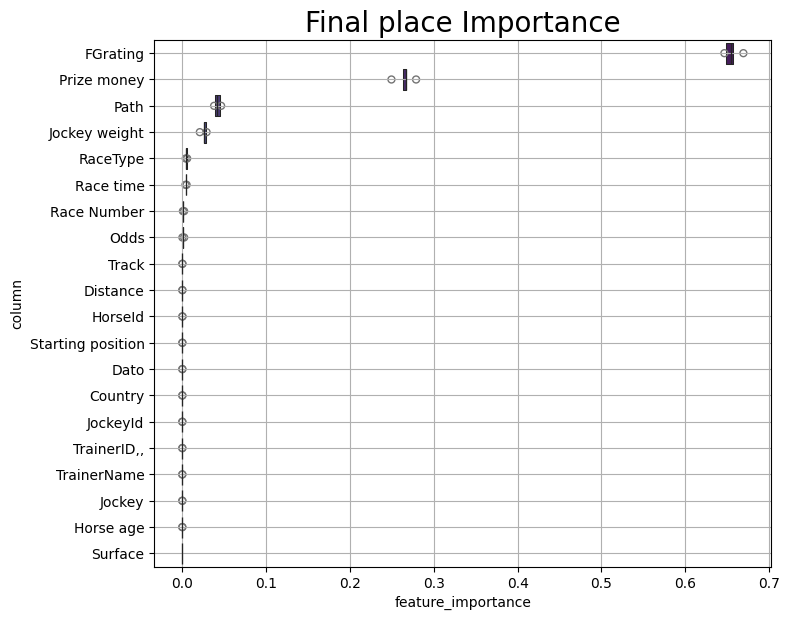

In [45]:
# KFold setup
for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi = ydf.iloc[:, i]
    y = np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))

    # Fit RandomForestRegressor and get models
    oof, models = fit_rf(train_feat_df.values, y, cv, params=params, verbose=500)

    # Visualize feature importance
    fig, ax = visualize_importance(models, train_feat_df)
    ax.set_title(target[i] + ' Importance', fontsize=20)

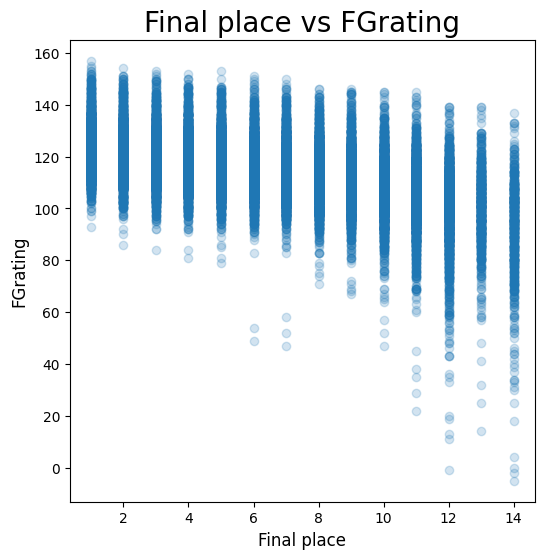

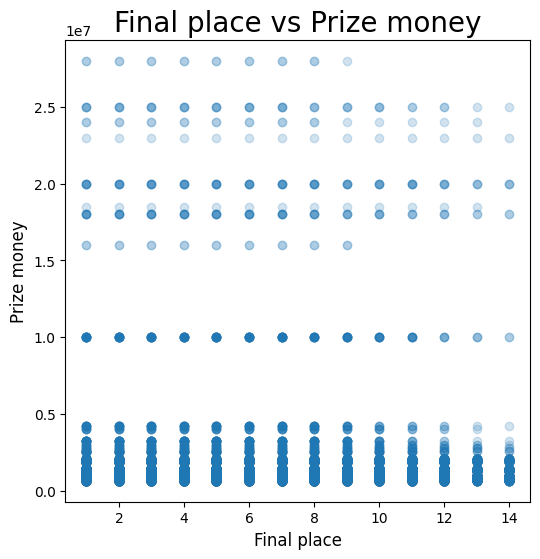

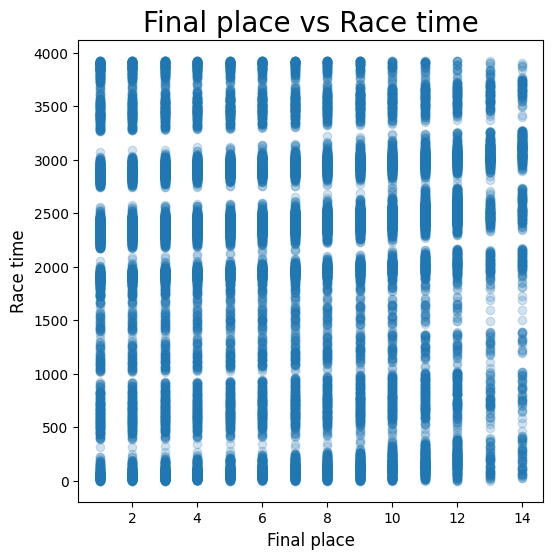

In [44]:
cols=['FGrating', 'Prize money', 'Race time']
for col in cols:
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_title('Final place vs '+col,fontsize=20)
    ax.set_xlabel('Final place',fontsize=12)
    ax.set_ylabel(col,fontsize=12)
    ax.scatter(data1['Final place'],data1[col],alpha=0.2)
    plt.show()